# PreMODIT: The robust range of temperature as a function of dE  

## What is the elower grid trange file?

The elower grid trange file contains the robust temeprature range, Tl and Th as a function of $\Delta E$, $T_\mathrm{ref}$, and $T_\mathrm{wt}$. 

Default elower_grid_trange file version=
(2, 75, 75, 39, 3)
(2, 75, 75, 39, 3)
Twt=151.42184657305015K, Tref=262.9312056656618K


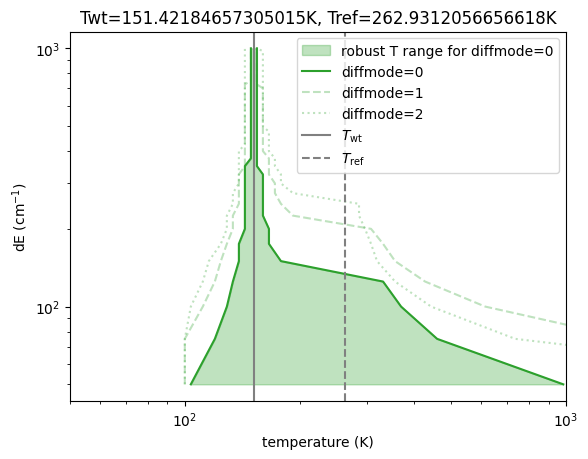

In [25]:
from exojax.spec.lbderror import default_elower_grid_trange_file
import numpy as np

filename = default_elower_grid_trange_file(version=2)
dat = np.load(filename)
arr = dat["arr_0"]
Tarr = dat["arr_1"] # np.logspace(np.log10(100),np.log10(5000),120)
Twtarr = dat["arr_2"] #np.logspace(np.log10(100.1),np.log10(2000.1),50)
Trefarr = dat["arr_3"] #Trefarr - np.logspace(np.log10(100),np.log10(2000),50)
dEarr = dat["arr_4"] #dEarr - np.linspace(100,1500,29)

print(np.shape(arr)) # (tl/th, len(Twtarr), len(Trefarr), len(dEarr), diffmode0,1,2)
print((2, len(Twtarr), len(Trefarr), len(dEarr),3))

i = 20
j = 30
Twt = Twtarr[i]
Tref = Trefarr[j]
subscript = "Twt="+str(Twt)+"K, Tref="+str(Tref)+"K"
print(subscript)


import matplotlib.pyplot as plt
diffmode = 0
tlow = arr[0,i,j,:,diffmode]
thigh = arr[1,i,j,:,diffmode]

plt.fill_betweenx(dEarr, tlow, thigh, color="C2", alpha=0.3, label="robust T range for diffmode=0")
plt.plot(tlow, dEarr, color="C2", label="diffmode=0")
plt.plot(thigh, dEarr, color="C2")

diffmode = 1
tlow = arr[0,i,j,:,diffmode]
thigh = arr[1,i,j,:,diffmode]
plt.plot(tlow, dEarr, color="C2", alpha=0.3, ls="dashed", label="diffmode=1")
plt.plot(thigh, dEarr, color="C2", alpha=0.3, ls="dashed")


diffmode = 2
tlow = arr[0,i,j,:,diffmode]
thigh = arr[1,i,j,:,diffmode]
plt.plot(tlow, dEarr, color="C2", alpha=0.3, ls="dotted", label="diffmode=2")
plt.plot(thigh, dEarr, color="C2", alpha=0.3, ls="dotted")


plt.axvline()
plt.axvline(Twt,label="$T_\mathrm{wt}$",color="gray")
plt.axvline(Tref,label="$T_\mathrm{ref}$",ls="dashed",color="gray")
plt.xscale("log")
plt.yscale("log")
plt.xlim(50,1000)
plt.xlabel("temperature (K)")
plt.ylabel("dE ($\\mathrm{cm}^{-1}$)")
plt.legend()
plt.title(subscript)
plt.show()

In [20]:
from exojax.spec.api import MdbHitemp
from exojax.spec.opacalc import OpaPremodit
from exojax.utils.grids import wavenumber_grid
nus_start = 10000.0
nus_end = 11000.0
N=1000
nus, wav, res = wavenumber_grid(nus_start,nus_end,N,unit="cm-1",xsmode="premodit")
mdb = MdbHitemp("CH4",nurange=[nus_start,nus_end], isotope=1)

opa = OpaPremodit(mdb, nu_grid=nus, allow_32bit=True, auto_trange=[100.0, 300.0],diffmode=2)

xsmode =  premodit
xsmode assumes ESLOG in wavenumber space: mode=premodit
We changed the policy of the order of wavenumber/wavelength grids
wavenumber grid should be in ascending order and now 
users can specify the order of the wavelength grid by themselves.
Your wavelength grid is in ***  descending  *** order
This might causes the bug if you update ExoJAX. 
Note that the older ExoJAX assumes ascending order as wavelength grid.


/home/kawahara/exojax/src/exojax/utils/grids.py:145: UserWarning: Resolution may be too small. R=10481.566628569737
  warnings.warn('Resolution may be too small. R=' + str(resolution),
/home/kawahara/exojax/src/exojax/utils/jaxstatus.py:19: UserWarning: JAX is 32bit mode. We recommend to use 64bit mode. 
You can change to 64bit mode by writing 

    from jax import config 
    config.update("jax_enable_x64", True)

  warnings.warn(msg+how_change_msg)
/home/kawahara/exojax/src/exojax/spec/api.py:631: RuntimeWarning: divide by zero encountered in log
  self.logsij0 = np.log(self.line_strength_ref)


OpaPremodit: params automatically set.
Default elower_grid_trange file version=
Robust range: 100.0 - 4999.999999999999 K
Change the reference temperature from 296.0K to 1566.1143372700317 K.
OpaPremodit: Tref_broadening is set to  173.20508075688775 K
OpaPremodit: gamma_air and n_air are used. gamma_ref = gamma_air/Patm
# of reference width grid :  6
# of temperature exponent grid : 2


uniqidx: 100%|██████████| 4/4 [00:00<00:00, 42.00it/s]


Premodit: Twt= 127.82239346687354 K Tref= 1566.1143372700317 K
Making LSD:|####################| 100%
Making LSD:|####################| 100%
Making LSD:|####################| 100%
